In [1]:
N = (8 + 4 ) % 5 + 1 
print(N)

3


### Варіант 3. Номери вправ: 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27

In [2]:
import numpy as np
import pandas as pd
from geopy.distance import distance
import csv

df = pd.read_csv(r'D:\py\NationalNames.csv')

### 1. Виведіть перші 8 рядків набору даних.

In [3]:
#1
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### 2. Виведіть останні 8 рядків набору даних.

In [4]:
#2
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### 4. Отримайте загальну інформацію про дані у наборі даних.

In [5]:
#4
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### 5. Знайдіть кількість унікальних імен у наборі даних.

In [6]:
#5
df['Name'].nunique()

93889

### 6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних.

In [7]:
#6
df.groupby('Gender')[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


### 7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році.

In [8]:
#7
df[(df['Year'] == 2010) & (df['Gender'] == 'M')].head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


### 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне).


In [24]:
#8
year = 1947
filter = df[df['Year'] == year]
popular_name = filter.loc[filter['Count'].idxmax()]

print(f"The name is '{popular_name['Name']}' in {year}")


The name is 'Linda' in 1947


### 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [10]:
#9
df[df['Count'] == df['Count'].min()].shape[0]

254615

### 10. Підрахуйте кількість унікальних імен у кожному році


In [11]:
#10
df.groupby('Year')[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


### 11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [12]:
#11
unique_names_summary = df.groupby('Year')[['Name']].nunique()
unique_names_summary.loc[[unique_names_summary['Name'].idxmax()]]

,Name
Year,
2008,32488


### 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)


In [13]:
#12
unique_names_summary = df.groupby('Year')[['Name']].nunique()
year_with_max_unique_names = unique_names_summary['Name'].idxmax()
most_popular_name= df[df['Year'] == year_with_max_unique_names].sort_values(by='Count', ascending=False).iloc[0]

most_popular_name['Name']

'Jacob'

### 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [27]:
#18
gender_counts_by_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
year_count_f = (gender_counts_by_year['F'] > gender_counts_by_year['M']).sum()

year_count_f

54

### 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

<AxesSubplot:xlabel='Year', ylabel='Total births per year'>

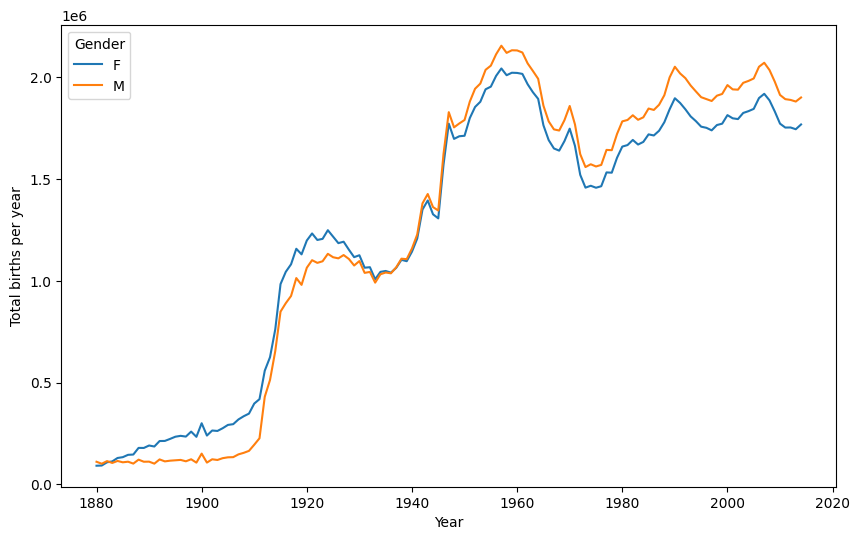

In [15]:
#19
df.groupby(['Year', 'Gender'])['Count'].sum().unstack().plot(figsize=(10, 6), xlabel='Year', ylabel='Total births per year')

### 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)


In [16]:
#20
gender_neutral_name_count = df.groupby(['Name', 'Gender'])['Count'].sum().unstack(fill_value=0).query("F > 0 and M > 0").shape[0]

gender_neutral_name_count

10221

### 21. Порахуйте, скільки разів хлопчиків називали Barbara

In [17]:
#21
boys_named_barbara = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

boys_named_barbara

4139

### 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)


In [28]:
#23
gender_neutral_names = df.groupby(['Name', 'Gender'])['Count'].sum().unstack(fill_value=0)
gender_neutral_names = gender_neutral_names.query("F > 0 and M > 0")
gender_neutral_names['Total'] = gender_neutral_names['F'] + gender_neutral_names['M']
top_16_gender_neutral_names = gender_neutral_names.sort_values(by='Total', ascending=False).head(16)

top_16_gender_neutral_names

Gender,F,M,Total
Name,,,
James,23177,5105919,5129096
John,21647,5084943,5106590
Robert,20090,4796695,4816785
Michael,21607,4309198,4330805
Mary,4115282,15159,4130441
William,15895,4055473,4071368
David,12853,3577704,3590557
Joseph,10592,2570095,2580687
Richard,9537,2555330,2564867


### 25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.

<AxesSubplot:xlabel='Year'>

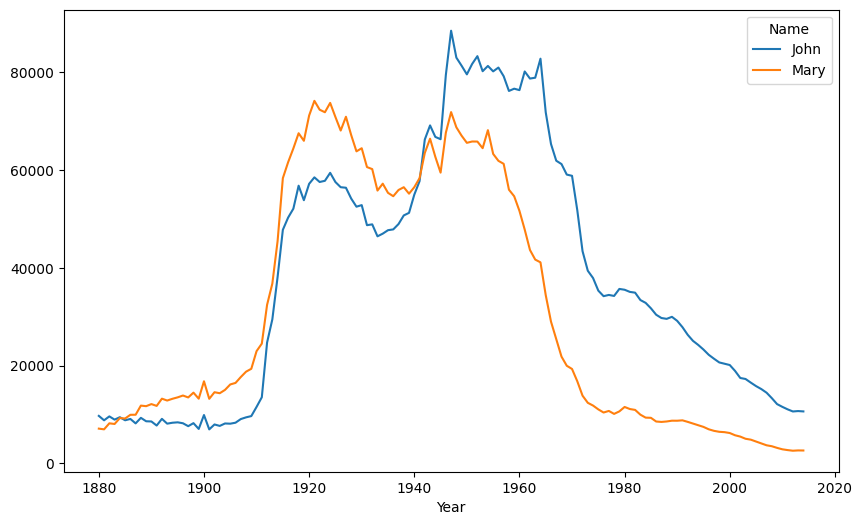

In [19]:
#25
df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack().plot(figsize=(10, 6), xlabel='Year')

In [20]:
#27
most_popular_names_per_year = df.loc[df.groupby('Year')['Count'].idxmax()]
result = most_popular_names_per_year[['Year', 'Name', 'Count']].groupby('Year').agg({'Name': 'first', 'Count': 'max'})

result

,Name,Count
Year,,
1880,John,9655
1881,John,8769
1882,John,9557
1883,John,8894
1884,John,9388
...,...,...
2010,Isabella,22883
2011,Sophia,21816
2012,Sophia,22267
